<a href="https://colab.research.google.com/github/ChrisDc777/SentimentAnalysis/blob/main/Org_notbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Tourist Accomodation Reviews

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
%matplotlib inline
import numpy as np
seed_val = 0
np.random.seed(seed_val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# i. Introduction

## 1. Domain Specific Area
Holidays are precious days in our lives that are full of experiences. Experiences that we gain by seeing different places, meeting with different people from different cultures, eating different food and staying overnight in a different environment. Tourists always have things to say about their holidays, whether they are good or bad. Tourist online platforms take advantage of this and encourage tourists to leave reviews about the tourism products they consumed while on holiday. These reviews are considered as a rich data source of information both for the tourism industry and for future travellers.

For the tourism industry, it is important to analyse the textual reviews so they can improve their products and offer better services which can then lead to attracting more customers and increasing their revenues. Moreover, they can improve their customer relationship management to provide better support and services. Additionally, some tourism businesses can learn, not only from their customers' experiences but also from their competitors’ customers who may leave reviews on the same platform.

However, the number of reviews that exist on a single platform is too high to be analysed manually by a team of people. Hence, Natural Language Processing (NLP) techniques together with Machine Learning methods, which were developed in recent years, can help in the analysis process by creating models, classifying texts and presenting the key insights from the huge amount of text data. Working on the task of extracting information about the contentment of the person reflected on the written text, is defined as sentiment analysis.

According to Ozen, I. A. (2021), sentiment analysis, which is a sub-field of text mining, is a field of study that analyses people's ideas and thoughts from text-based comments. Sentiment analysis can be applied at the document level, sentence level and aspect-based sentiment levels. Additionally, Jurafsky et al (2021) consider sentiment analysis, as a subfield of text categorisation, where the main task is the extraction of sentiment, which can be either the positive or negative orientation that a writer expresses toward some object.

Although the online reviews can benefit a tourism business, they can create the opposite effect: A particular business may receive a low ranking by the tourists, or its competitors receive a much higher ranking. This increase the competitiveness between the tourist product providers. Additionally, the whole touristic industry has tremendously suffered during the COVID-19 pandemic, and it is trying to recover. This is still difficult, as some travel restrictions are still in place and there is still some fear in the society. Therefore, the tourism business, such as accommodation providers should take advantage of the new data science technologies and the existing publicly available reviews datasets to create sentiment analysis models that could help them position themselves ahead in this market.

## 2. Objectives
The objective of this work is to create a sentiment analysis model for the tourism industry, especially for the accommodation sector which includes hotels, hostels, B&Bs and holidays resorts among others.
The model will have two main functions:

1.	It will potentially show the keywords that are used in negative and positive reviews and
2.	It will serve as a predictor for the positivity or negativity of future textual reviews from future customers.

A business within the tourism industry could potentially understand better what are the main things that affect a tourist experience in holiday accommodation. For example, if many positive reviews have to do with the breakfast, the business could put emphasis on the breakfast, or if it is the bed quality, then the business should realise that it is important to have a good quality mattresses and do replace them when they are worn off. Similarly, if the bad reviews have to do with noise, the business should keep their accommodation as quiet as possible. The model insights will be useful for any tourism business.

The second function of the model will be an essential part of the plan in the continuous improvement team of the tourism business.
The business could politely request from the customers to write or voice record their experience in their hotel or resort. The business should store this as a privately owned database. Then, they could predict the sentiment analysis from their customers without asking them to give them a ranking, as this could be predicted from the model. These insights could be very useful, so the business, could add this information to other internal work-recording datasets and they would be able to detect specific areas of concern or for improvement within the business, for example, if there was a problem with the reception not being available for public, or if the cleaning staff hasn’t done the job correctly on specific times.

## 3. Dataset

The dataset is publicly available and it was extracted from Kaggle as a CSV file (Trip Advisor Hotel Reviews, 2020). The dataset was provided by the TripAdvisor Website. TripAdvisor is a leading web platform where people can get information and advice about different tourist destinations, products and services as well as about entertainment activities and restaurants. It is user-generated content as users both look for information and share their experiences and reviews about the different touristic products.
This specific dataset contains reviews, which were left by users in TripAdvisor, about different accommodation places around the globe.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset/tripadvisor_hotel_reviews.csv')

In [ ]:
#look at the dataset
df.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,nice hotel expensive parking got good deal sta...,4,Pos,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Neg,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neu,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Pos,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,Pos,great stay great stay went seahawk game aweso...


In [ ]:
#look at the numbers of samples
len(df)

20491

In [ ]:
#look at the data types
df.dtypes

Review    object
Rating     int64
dtype: object

In [ ]:
#checking that there is no missing data
df["Review"].isna().sum()


0

In [ ]:
#checking that there is no missing data
df["Rating"].isna().sum()

0

In [ ]:
#checking the existing values of 'Rating'
print(sorted(df['Rating'].unique()))

[1, 2, 3, 4, 5]


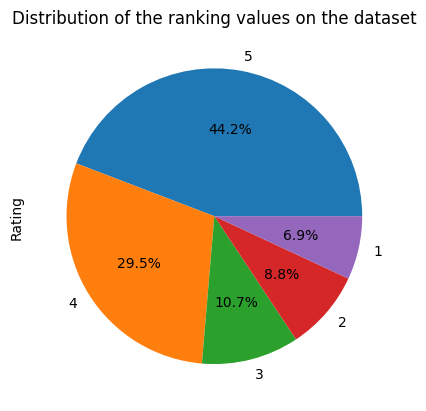

In [ ]:
#looking at the distribution of the different values in rating
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the ranking values on the dataset')
plt.show()

<ipython-input-10-cc046c843659>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


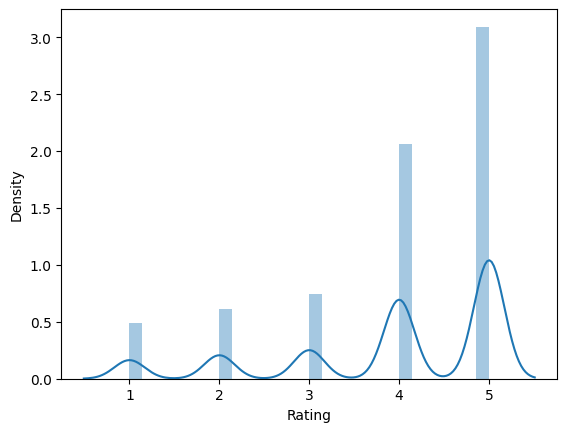

In [ ]:
sns.distplot(df['Rating'])
plt.show()

It contains almost twenty thousand five hundred reviews. Each of them consists of two items, one for the textual review and the second is the rating, which is an integer value from 1 to 5.
From the above pie chart, we can see that the percentage corresponding to each value increases with its ranking. Fewer people give low values reviews and more people give good values reviews. From this, we can conclude that the people are generally happy with the product and services they receive in a holiday accommodation.

## 4. Evaluation method
The most common evaluation parameter for classification problems, such as sentiment analysis, is the accuracy percentage. However, it is not a sufficient metric for the efficiency of the model when the data that the model is based on, is unbalanced. In these cases, there are many other metrics that can help determine whether the model is good.  

First, we can create a confusion matrix.  It is a 2-dimensional array, where the rows represent the predicted values for each class and the columns represent the true values for each class and the cell is the count of the samples which were originally classified as their column class and predicted as its raw class. Hence, for a model that has a 100% accuracy, we would see numbers in the diagonal from top left to right bottom, and zeros all around the matrix. Similarly, for good models, we would expect high-value numbers in the diagonal and low-value numbers and zeros around.

From the confusion matrix, we could calculate the recall and precision as well. The recall (R )  is the percentage of the total number of correctly classified items of a specific class out of all the present items for this class.  The precision (P) is the percentage of the correctly classified items for a particular class out of all the items that were classified as this class. From these two parameters, we can define a third metric that combines the two of them, the F-measure.

When we are working with more than two classes, we could calculate an f1 by microaveraging or macroaveraging, when we calculate it by macroaveraging, we average the f1 that was calculated for each class and average them. This way, all the classes have the same weight. On the other hand, if we use the microaverage, we will take into account the initial weight of each class in the dataset, hence, it will be dominated by the most frequent one.

For this work, it was decided to take into account both the accuracy and the f1 which was calculated by macroaveraging, as well as the f1 for each of the classes.


# ii. Implementation
### 5. Pre-processing
First of all, we would simplify the sentiment analysis task by classifying rankings 4 and 5 as positive sentiments, 1 and 2 as negative sentiments and 3 as neutral sentiments.

In [ ]:
#generate the new 'sentiment' column
classification=[]
for i in range(len(df)):
    if df['Rating'][i]>=4:
        rev='Pos'
    elif df['Rating'][i]==3:
        rev='Neu'
    else:
        rev='Neg'
    classification.append(rev)
df['sentiment']=classification

In [ ]:
df.head()

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,Pos
1,ok nothing special charge diamond member hilto...,2,Neg
2,nice rooms not 4* experience hotel monaco seat...,3,Neu
3,"unique, great stay, wonderful time hotel monac...",5,Pos
4,"great stay great stay, went seahawk game aweso...",5,Pos


We look back at the distribution of the new feature "sentiment"

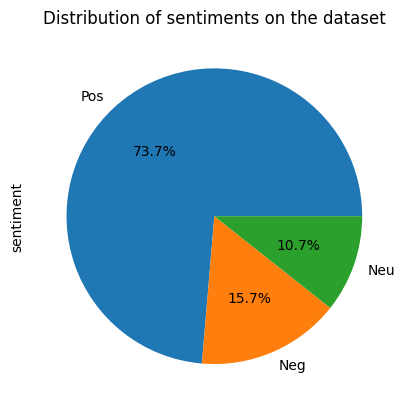

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of sentiments on the dataset')
plt.savefig('sentimentDistribution.png')
plt.show()

We look at one positive example and one negative example

In [ ]:
print(df['Review'][0])
print(df['sentiment'][0])

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
Pos


In [ ]:
print(df['Review'][1])
print(df['sentiment'][1])

ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bus

### Text preprocessing strategies
We plan different strategies of preprocessing text with modelling and then evaluate all of them together.
##### 5.1. Simple clean and bag of words for the baseline model
##### 5.2. Simple clean, adding embeddings of adjectives in the text and lemmatisation on the text and then proceed with a bag of words, while excluding "stop words".
 This type of preprocessing is generally used for text classification tasks.
##### 5.3. Simple clean and lemmatisation, removal of "stop words" and counting only once each word that appears in the review, extracting only a few of the most common words in the full text.
This type of preprocessing is generally used for sentiment analysis tasks.
##### 5.4. No pre-process
The un-processed reviews will be used with pre-prepared lexicon-based models for sentiment analysis

Along with the work, we will do the preprocessing techniques and apply different machine models to the pre-processed data.
We will start with the simple preprocessing strategy that will be used to create a baseline model.
##### 5.1. Simple clean and bag of words for the baseline model

In [ ]:
#define the funcrion for initial cleaning
def clean_rev_1(text):
    text.lower()
    #remove everything that are not letters
    text=re.sub('[^a-z]', " ", text)
    return text

In [ ]:
# Define the text cleaning function
def clean_rev_2(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove punctuation and special characters
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [ ]:
#apply cleaning function to the reviews
simple_cleaned_reviews=[clean_rev_1(df['Review'][i]) for i in range(len(df))]

In [ ]:
#store in the same DataFrame
df['simple_cleaned_reviews']=simple_cleaned_reviews

In [ ]:
df.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,nice hotel expensive parking got good deal sta...,4,Pos,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Neg,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neu,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Pos,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,Pos,great stay great stay went seahawk game aweso...


In [ ]:
#shuffle the data
df_shuffled = df.sample(frac=1).reset_index(drop=True)

### 6. Build a baseline classifier
In this part we will build a baseline model with Naive Bayes, using a Gaussian distribution and 'Bag of words' as preprocessing technique removing the most common words which are generally called "stop words".
The Naive Bayes model works by calculating the posterior probability of a review to be considered as a specific class, given the evidence of certain features which are the bag of words or scientificaly known tfidf(*term frequency X inverse document frequency*) for each review.

In [ ]:
#import the relevant libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

In [ ]:
#create a bag of words, which is vectorising the data, we will take the 1500 most commmon features
vectorised_data=TfidfVectorizer(max_features=1500, stop_words='english').fit_transform(df_shuffled['simple_cleaned_reviews']).toarray()

In [ ]:
#Create an array with the labels
labels=df_shuffled['sentiment'].values

In [ ]:
#Define the sentiment labels in 'sentiment order'
unique_labels=['Pos', 'Neu','Neg']

In [ ]:
#split the data into train x and y sets and test x and y sets
x_train=vectorised_data[:int(len(df)*0.75)]
y_train=labels[:int(len(df)*0.75)]
x_test=vectorised_data[int(len(df)*0.75):]
y_test=labels[int(len(df)*0.75):]

In [ ]:
#Define the classifier, train the classifier and get the predicted values for the x test set
clf=GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred, labels=unique_labels)
print(matrix)

[[2849  691  272]
 [ 130  241  164]
 [  43  151  582]]


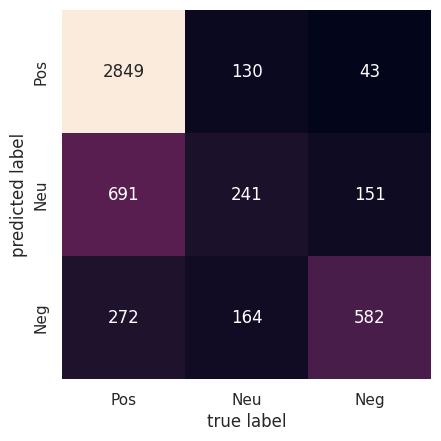

In [ ]:
#visualise the confusion matrix
import seaborn as sns
sns.set()
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
#import the specific metrics to meausure
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
f1_macroNB=f1_score(y_test, y_pred, average='macro')
f1_macroNB

0.5935001288769658

In [ ]:
f1NB=f1_score(y_test, y_pred, average=None)
f1NB

array([0.64882943, 0.29789864, 0.83377231])

In [ ]:
accuracyNB=accuracy_score(y_test, y_pred)
accuracyNB

0.7167675190318173

From the above confusion matrix, we can see that the baseline classifier has done an acceptable job, classifying well most of the 'reviews'.
There was mostly confusion in a big part of the reviews that were classified as neutral while they were positive, and a relatively small amount of the positive was mistakenly classified as negative. Additionally, most of the negatives were correctly classified. Furthermore, the accuracy was around 72% which is acceptable, however, we expect to have an overall accuracy higher than 73.7% which is the percentage of all the positive reviews. The f1 scores are also considered ok and will be used as a comparison point for the newly created models.

### 7. Developing a better classifier
#### Actually removed embeddings too cause of errors and long processing time.
From this part, we will look at the different pre-processing strategies with the different classification methods and evaluate them to get the best model.

We will start by applying the second pre-processing strategy:
##### 5.2. Simple clean, using lemmatisation on the text and then proceed with a bag of words, while excluding "stop words".

In the first part of the pre-processing, we will lemmatise each of the words to get only the important stem of the word.

In the last stage, we will create a bag of words, while removing the stop words.

Finally, we will separate the data into the training and test sets, separating them into the xs and ys, the xs are the preprocessed text data and the ys are the sentiment labels.

In [ ]:
#visualise the reviews
print('Simple cleaned review:')
print(df_shuffled['simple_cleaned_reviews'][15])


Simple cleaned review:
fab friendly hotel just stayed friendly efficient hotel berlin  good location quite central useful public transport strike  delux roof room bath room well worth nice touch luxury  breakfast buffet best ive seen dinner restaurant excellent roof open warm weather  bar funky serves great cocktails shame wasnt people fact hotel quiet overall add atmosphere  love berlin summer stay   


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import wordnet
nltk.download('wordnet')
nltk.download('punkt')
wnl=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_shuffled.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,best ok restaurant food good housekeeping staf...,2,Neg,best ok restaurant food good housekeeping staf...
1,"lovely hotel bit expensive liked hotel, nice e...",4,Pos,lovely hotel bit expensive liked hotel nice e...
2,oasis ny stayed hotel long weekend sightseeing...,4,Pos,oasis ny stayed hotel long weekend sightseeing...
3,no breakfast just returned home san francisco ...,3,Neu,no breakfast just returned home san francisco ...
4,noise door spent nights acevi villarroel hotel...,3,Neu,noise door spent nights acevi villarroel hotel...


In [ ]:
def lemmatise_review(review):
    word_list = nltk.word_tokenize(review)
    lemmatized_review = ' '.join([wnl.lemmatize(w, pos='v') for w in word_list])
    return lemmatized_review

In [ ]:
lemmatized_reviewes=[lemmatise_review(df_shuffled['simple_cleaned_reviews'][i]) for i in range(len(df_shuffled))]
df_shuffled['lemmatized_reviews']=lemmatized_reviewes

In [ ]:
print('Simple cleaned reviews:')
print(df_shuffled['simple_cleaned_reviews'][15])
print('-----')
print('lemmatised review:')
print(df_shuffled['lemmatized_reviews'][15])

Simple cleaned reviews:
fab friendly hotel just stayed friendly efficient hotel berlin  good location quite central useful public transport strike  delux roof room bath room well worth nice touch luxury  breakfast buffet best ive seen dinner restaurant excellent roof open warm weather  bar funky serves great cocktails shame wasnt people fact hotel quiet overall add atmosphere  love berlin summer stay   
-----
lemmatised review:
fab friendly hotel just stay friendly efficient hotel berlin good location quite central useful public transport strike delux roof room bath room well worth nice touch luxury breakfast buffet best ive see dinner restaurant excellent roof open warm weather bar funky serve great cocktails shame wasnt people fact hotel quiet overall add atmosphere love berlin summer stay


In [ ]:
df_shuffled.head()

,Review,Rating,sentiment,simple_cleaned_reviews,lemmatized_reviews
0,best ok restaurant food good housekeeping staf...,2,Neg,best ok restaurant food good housekeeping staf...,best ok restaurant food good housekeep staff f...
1,"lovely hotel bit expensive liked hotel, nice e...",4,Pos,lovely hotel bit expensive liked hotel nice e...,lovely hotel bite expensive like hotel nice el...
2,oasis ny stayed hotel long weekend sightseeing...,4,Pos,oasis ny stayed hotel long weekend sightseeing...,oasis ny stay hotel long weekend sightsee new ...
3,no breakfast just returned home san francisco ...,3,Neu,no breakfast just returned home san francisco ...,no breakfast just return home san francisco st...
4,noise door spent nights acevi villarroel hotel...,3,Neu,noise door spent nights acevi villarroel hotel...,noise door spend nights acevi villarroel hotel...


In [ ]:
vectorised_cured_data=TfidfVectorizer(max_features=1500, stop_words='english').fit_transform(df_shuffled['lemmatized_reviews']).toarray()

In [ ]:
x_train=vectorised_cured_data[:int(len(df)*0.75)]
y_train=labels[:int(len(df)*0.75)]
x_test=vectorised_cured_data[int(len(df)*0.75):]
y_test=labels[int(len(df)*0.75):]

#### Building the models
We choose different machine learning models that we could use to evaluate.
##### 1. Gaussian Naive Bayes
This is the same model as was used in the baseline, it is generally used for NLP tasks as it can deal with a large number of features and does have many hyperparameters to modify.
##### 2. Multinomial Naive Bayes
This model works as well with Naive Bayes probability but this time, it assumes a multinomial distribution, which is more suitable for this type of dataset.
##### 3. Decision Tree
This model works by generating simple rules with True/False decisions on the given data. It can give sometimes good results however, it may suffer from overfitting.
##### 4. Suport Vector Machine
This model generates a classifier by creating hyperplanes on the operational space while maximising the gap between the different classes. It is known to be one of the most powerful machine learning methods.
##### 5. Weighted Support Vector Machine
As our dataset is unbalanced, we give this additional information as a hyperparameter in the model to maximise its performance.

We will train and test each of the models, visualising the confusion matrix and saving the evaluation metric parameters, we will evaluate and compare all the models together at the latest stage, comparing them to the baseline model and will choose the best model.



We start with the first model:
#### 1. Gaussian Naive Bayes

In [ ]:
#train the model
clfGNB=GaussianNB()
clfGNB.fit(x_train,y_train)

GaussianNB()

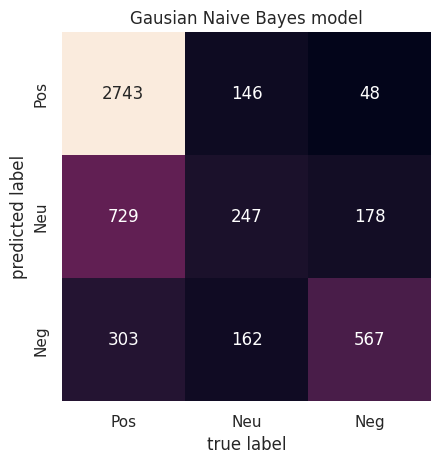

In [ ]:
#get the predictions and generate the matrix
y_pred=clfGNB.predict(x_test)
matrix1=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Gausian Naive Bayes model')
plt.show()

In [ ]:
#calculate the evaluation metrics
f1_macroGNB=f1_score(y_test, y_pred, average='macro')
f1_macroGNB

0.5917715060010651

In [ ]:
accuracyGNB=accuracy_score(y_test, y_pred)
accuracyGNB

0.7073980089791138

In [ ]:
f1_GNB=f1_score(y_test, y_pred, average=None)
f1_GNB

array([0.65283231, 0.29782225, 0.82465996])

#### 2. Multinomial Naive Bayes

In [ ]:
#train the model
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [ ]:
#get the predictions
y_pred=clf.predict(x_test)

In [ ]:
 #generate the matrix
matrix2=confusion_matrix(y_test,y_pred, labels=unique_labels)


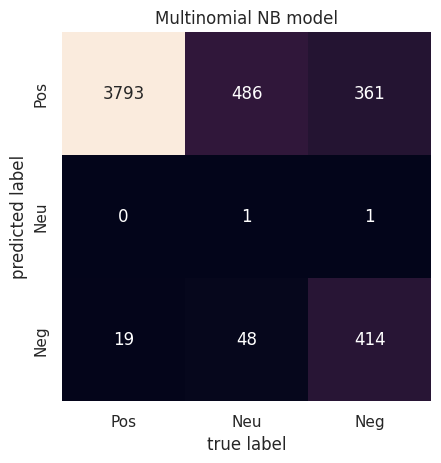

In [ ]:
#visualise the matrix
sns.heatmap(matrix2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Multinomial NB model')
plt.show()

In [ ]:
#calculate the evaluation metrics
f1_macroMNNB=f1_score(y_test, y_pred, average='macro')
f1_macroMNNB

0.5199915519942898

In [ ]:
f1_MNNB=f1_score(y_test, y_pred, average=None)
f1_MNNB

array([0.65871122, 0.00372439, 0.89753904])

In [ ]:
accuracyMNNB=accuracy_score(y_test, y_pred)
accuracyMNNB

0.8213937146203396

#### 3. Decision Tree

In [ ]:
#import and create the classifier
from sklearn.tree import DecisionTreeClassifier
DTclf=DecisionTreeClassifier()

In [ ]:
#train the classifier
DTclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict the values
y_pred=DTclf.predict(x_test)

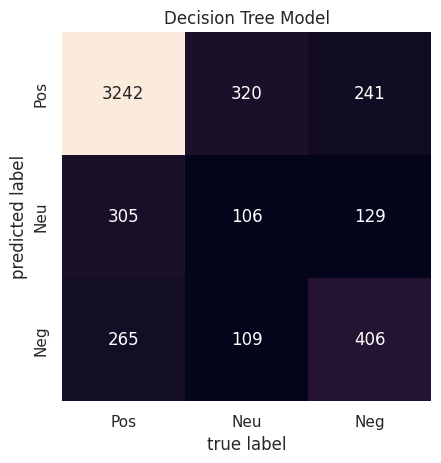

In [ ]:
matrix3=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree Model') #just simple cleaned reviews in this
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroDT=f1_score(y_test, y_pred, average='macro')
f1_macroDT

0.5235125164697623

In [ ]:
f1_DT=f1_score(y_test, y_pred, average=None)
f1_DT

array([0.5218509 , 0.1972093 , 0.85147735])

In [ ]:
accuracyDT=accuracy_score(y_test, y_pred)
accuracyDT

0.7327737653718525

#### 4. Suport Vector Machine

In [ ]:
#import and create a classifier
from sklearn import svm
clfsvc = svm.SVC(decision_function_shape='ovo')

In [ ]:
#train the classifier #takes 3 mins
clfsvc.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
#get predictions
y_pred=clfsvc.predict(x_test)

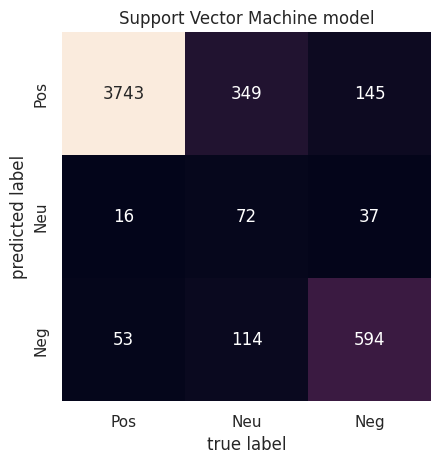

In [ ]:
#create and visualise the confusion matrix
matrix4=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix4.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Support Vector Machine model')
plt.savefig('svmConfMatrix.png')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroSVM=f1_score(y_test, y_pred, average='macro')
f1_macroSVM

0.6403898428468172

In [ ]:
f1_SVM=f1_score(y_test, y_pred, average=None)
f1_SVM

array([0.77293429, 0.21818182, 0.93005342])

In [ ]:
accuracySVM=accuracy_score(y_test, y_pred)
accuracySVM

0.8606285379660356

#### 5. Weighted Support Vector Machine

In [ ]:
#create the classifier with class weight
clfsvcW = svm.SVC(decision_function_shape='ovo', class_weight={'Pos':7, 'Neu':1, 'Neg':1.5 })

In [ ]:
#train and predict #takes 5 mins
clfsvcW.fit(x_train,y_train)
y_pred=clfsvcW.predict(x_test)

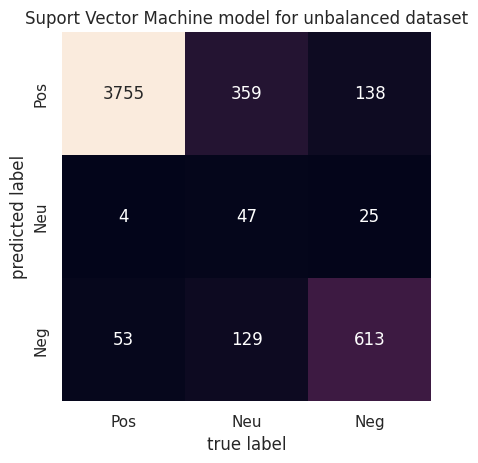

In [ ]:
#create and visualise matrix
matrix5=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix5.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model for unbalanced dataset')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroSVMW=f1_score(y_test, y_pred, average='macro')
f1_macroSVMW

0.6218468033693209

In [ ]:
f1_SVMW=f1_score(y_test, y_pred, average=None)
f1_SVMW

array([0.78039465, 0.15384615, 0.9312996 ])

In [ ]:
accuracySVMW=accuracy_score(y_test, y_pred)
accuracySVMW

0.8617997267226235

#### 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define the logistic regression model
LRclf = LogisticRegression()

# Train the model on the training data
LRclf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict the labels of the test data
y_pred = LRclf.predict(x_test)

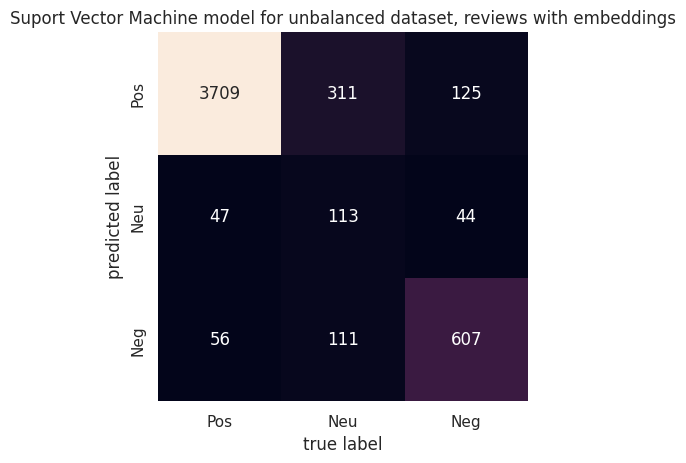

In [ ]:
#generate the matrix
matrix6=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix6.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model for unbalanced dataset, reviews with embeddings')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroLogReg=f1_score(y_test, y_pred, average='macro')
f1_macroLogReg

0.6737684608951238

In [ ]:
f1_LogReg=f1_score(y_test, y_pred, average=None)
f1_LogReg

array([0.78322581, 0.30581867, 0.9322609 ])

In [ ]:
accuracyLogReg=accuracy_score(y_test, y_pred)
accuracyLogReg

0.8645325004879953

#### 7. Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
RFclf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# Train the model on the training data
RFclf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Predict the labels of the test data
y_pred = RFclf.predict(x_test)

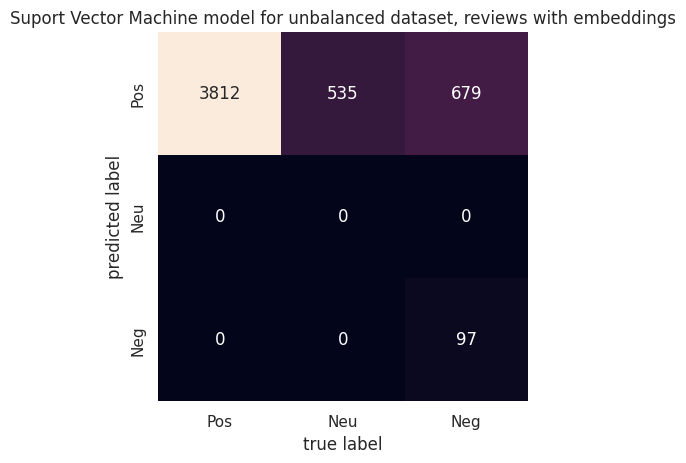

In [ ]:
#generate the matrix
matrix7=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix7.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model for unbalanced dataset')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroRanFor=f1_score(y_test, y_pred, average='macro')
f1_macroRanFor

0.3616202760805612

In [ ]:
f1_RanFor=f1_score(y_test, y_pred, average=None)
f1_RanFor

array([0.22222222, 0.        , 0.86263861])

In [ ]:
accuracyRanFor=accuracy_score(y_test, y_pred)
accuracyRanFor

0.7630294749170408

#### 8. KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the K-Nearest Neighbors model
KNNclf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model on the training data
KNNclf.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the labels of the test data
y_pred = KNNclf.predict(x_test)

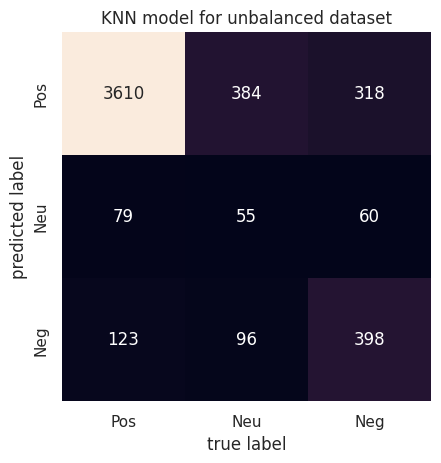

In [ ]:
#generate the matrix
matrix8=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix8.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('KNN model for unbalanced dataset')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroKNN=f1_score(y_test, y_pred, average='macro')
f1_macroKNN

0.5370149899755823

In [ ]:
f1_KNN=f1_score(y_test, y_pred, average=None)
f1_KNN

array([0.57142857, 0.15089163, 0.88872477])

In [ ]:
accuracyKNN=accuracy_score(y_test, y_pred)
accuracyKNN

0.7930899863361311

#### 5.3. Simple clean and lemmatisation, removal of "stop words" and counting only once each word that appears in the review, extracting only a few of the most common words in the full text.
In this section, we will proceed with the third pre-processing technique, this technique is generally used for sentiment analysis tasks. It consists in generating a list of the most common words in the text, selecting an 'N' number of the most common words or features, and then generating a dictionary for every review where the keys are the words and the values are a Boolean value indicating whether the feature appears in the review.
This method differs from the previous one as we work with a smaller number of features and "count" each feature only once, hence there is no need for embeddings.

To do this, we start by lemmatising the reviews while removing the "stop words". Then we join all the reviews and create a frequency distribution of all the corpus. Then we create a list of the N most common words, in this case, we will use N=500.
Then we will extract the features from each review creating a dictionary for each of them.
Finally, to process the data in the NLTK machine learning methods, we will create a set of the dictionary with the extracted features together with the review label. Similarly, as in the previous part, we would separate the data into training and test sets.

In [ ]:
#get the stop words
stops=set(stopwords.words('english'))

In [ ]:
#define a function to lemmatise the reviews
def lemmatise_clean_review(review):
    word_list = nltk.word_tokenize(review)
    lemmatized_review = ' '.join([wnl.lemmatize(w) for w in word_list if w not in stops])
    return lemmatized_review

In [ ]:
#lemmatise the reviews
cleaned_reviews= [lemmatise_clean_review(review) for review in simple_cleaned_reviews]

In [ ]:
#join all the corpus in a single string
all_reviews=' '.join(cleaned_reviews)

In [ ]:
#Create a frequency distribution of the words in the corpus
all_words = nltk.FreqDist(w for w in all_reviews.split())

In [ ]:
all_words

FreqDist({'hotel': 54050, 'room': 47779, 'great': 21485, 'n': 19112, 'good': 17491, 'staff': 16706, 'stay': 15601, 'night': 14577, 'day': 13484, 'time': 12981, ...})

In [ ]:
#generate a list of the 500 most common words
N=500
word_features = list(all_words)[:N]

In [ ]:
#show the 30 most common features
word_features[:30]

['hotel',
 'room',
 'great',
 'n',
 'good',
 'staff',
 'stay',
 'night',
 'day',
 'time',
 'nice',
 'location',
 'service',
 'beach',
 'stayed',
 'restaurant',
 'breakfast',
 'food',
 'clean',
 'place',
 'resort',
 'pool',
 'like',
 'really',
 'bed',
 'area',
 'bar',
 'friendly',
 'people',
 'small']

In [ ]:
# build a function to extract the features from each review
def review_features(review):
    words = nltk.word_tokenize(review)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in words)
    return features

In [ ]:
#extract the features from each review and store this in a list
feature_reviews =[review_features(df_shuffled['simple_cleaned_reviews'][i]) for i in range(len(df))]

In [ ]:
#generate a list of sets
features_labels_set=[(feature_reviews[i],df_shuffled['sentiment'][i]) for i in range(len(df))]

In [ ]:
#splitting the data into training and test sets
train_data=features_labels_set[:int(len(df)*0.75)]
test_data=features_labels_set[int(len(df)*0.75):]

In [ ]:
#generating only the x test set so we will be able to predict the values and evaluate the models on the same way as the previous models
x_test=feature_reviews[int(len(df)*0.75):]

#### Building the models
As in the previous section, we will work with similar models as previously used.

##### 1. Naive Bayes
##### 2. Decision Tree
##### 3. Support Vector Machine

For the first two, we will use the models as they come from the NLTK library which handles this type of organisation of the data,
for the third one, we will process it further to apply it in the sklearn model as this model is not available in NLTK anymore.


We will start with Naive Bayes
#### 1. Naive Bayes

In [ ]:
#Generate the model and train it
NBclassifier = nltk.NaiveBayesClassifier.train(train_data)

In [ ]:
#generate the prediction for the test data
y_pred=[NBclassifier.classify(review) for review in x_test]

In [ ]:
#transfer it as an array
y_pred_array=np.array(y_pred)

In [ ]:
#get the real test labels so we will be able to compare
y_test=df_shuffled['sentiment'][int(len(df)*0.75):].values

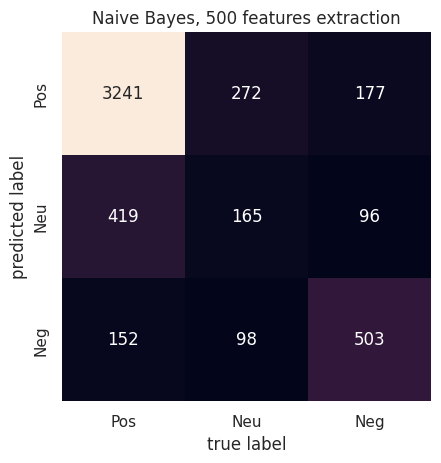

In [ ]:
#generate the confusion matrix to evaluate
matrix9=confusion_matrix(y_test,y_pred_array, labels=unique_labels)
sns.heatmap(matrix9.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Naive Bayes, 500 features extraction')
plt.show()

In [ ]:
accuracyNBFeatureExtraction=nltk.classify.accuracy(NBclassifier, test_data)
accuracyNBFeatureExtraction

0.7630294749170408

In [ ]:
f1_macroNBFeatureExtraction=f1_score(y_test,y_pred_array, average='macro')
f1_macroNBFeatureExtraction

0.5978625218154416

In [ ]:
f1_NBFeatureExtraction=f1_score(y_test,y_pred_array, average=None)
f1_NBFeatureExtraction

array([0.65794637, 0.27160494, 0.86403626])

#### The Naive Bayes classifier is capable of presenting the most informative features

In [ ]:
NBclassifier.show_most_informative_features(50)

Most Informative Features
         contains(dirty) = True              Neg : Pos    =     14.5 : 1.0
         contains(worst) = True              Neg : Pos    =     13.5 : 1.0
          contains(rude) = True              Neg : Pos    =      9.6 : 1.0
       contains(perfect) = True              Pos : Neg    =      6.5 : 1.0
         contains(loved) = True              Pos : Neg    =      6.2 : 1.0
       contains(finally) = True              Neg : Pos    =      5.9 : 1.0
        contains(superb) = True              Pos : Neg    =      5.8 : 1.0
          contains(poor) = True              Neg : Pos    =      5.7 : 1.0
          contains(told) = True              Neg : Pos    =      5.5 : 1.0
      contains(spacious) = True              Pos : Neg    =      4.8 : 1.0
     contains(fantastic) = True              Pos : Neg    =      4.8 : 1.0
        contains(highly) = True              Pos : Neu    =      4.5 : 1.0
        contains(modern) = True              Pos : Neg    =      4.4 : 1.0

It is interesting to see that some words are obvious to be in a specific class such as: 'perfect', 'loved', 'superb' as keywords for positive reviews and words such as 'worst','poor','dirty' for negatives but some words that we wouldn't expect, are actually key to classify a class. For example: 'finally' appears to be one of the keywords for negative reviews, meaning that people wrote an experience and commented how it finished. In the same way, the words 'told', 'said' and 'manager' have to do with negative reviews, as people had such bad experiences that needed to speak with the accommodation manager and they write what they were 'told'. Another interesting insight is to see 'Paris' and 'London' as keywords for positive reviews. Obviously, there are good and not so good hotels in both cities, however, people have mainly positive experiences while staying in these cities, this could be due to the high competitiveness in the touristic market and the need to provide higher than expected services to the tourists.

#### 2. Decision Tree

In [ ]:
#Create the Decision Tree classifier, train the data and predict the values for the x_test dataset. # 2 mins
DTclassifier = nltk.DecisionTreeClassifier.train(train_data)
y_pred=[DTclassifier.classify(review) for review in x_test]

In [ ]:
y_pred_array=np.array(y_pred)

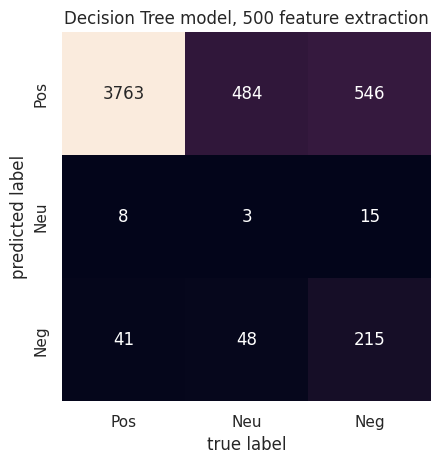

In [ ]:
#visualise the results
matrix10=confusion_matrix(y_test,y_pred_array, labels=unique_labels)
sns.heatmap(matrix10.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree model, 500 feature extraction')
plt.show()

In [ ]:
accuracyDTFeatureExtraction=nltk.classify.accuracy(DTclassifier, test_data)
accuracyDTFeatureExtraction

0.777083739996096

In [ ]:
f1_macroDTFeatureExtraction=f1_score(y_test,y_pred_array, average='macro')
f1_macroDTFeatureExtraction

0.42781704049491814

In [ ]:
f1_DTFeatureExtraction=f1_score(y_test,y_pred_array, average=None)
f1_DTFeatureExtraction

array([0.39814815, 0.01069519, 0.87460779])

#### 3. Suport Vector Machine
As the SVM classifier within NLTK library was deprecated, we should use the SVM from sklearn.
But first, we need to convert the list of feature extraction dictionaries into an numpy array.
Then, we can split the data as similarly done in the previous sections.

In [ ]:
feature_reviews_list_of_list=[list(review.values()) for review in feature_reviews ]

In [ ]:
feature_reviews_array=np.array(feature_reviews_list_of_list)

In [ ]:
x_train=feature_reviews_array[:int(len(df)*0.75)]
x_test=feature_reviews_array[int(len(df)*0.75):]
y_train=labels[:int(len(df)*0.75)]
y_test=labels[int(len(df)*0.75):]

In [ ]:
clfsvc_500_features = svm.SVC(decision_function_shape='ovo')
clfsvc_500_features.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
y_pred=clfsvc_500_features.predict(x_test)

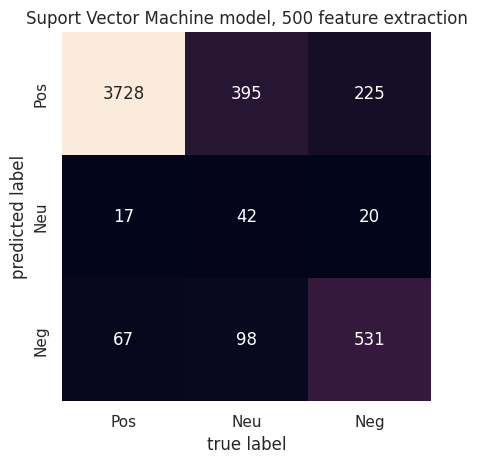

In [ ]:
matrix11=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix11.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model, 500 feature extraction')
plt.show()

In [ ]:
accuracySVMFeatureExtraction=accuracy_score(y_test, y_pred)
accuracySVMFeatureExtraction

0.8395471403474527

In [ ]:
f1_macroSVMFeatureExtraction=f1_score(y_test, y_pred, average='macro')
f1_macroSVMFeatureExtraction

0.5906668996966675

In [ ]:
f1_SVMFeatureExtraction=f1_score(y_test, y_pred, average=None)
f1_SVMFeatureExtraction

array([0.72146739, 0.13680782, 0.91372549])

#### 5.4. No pre-processs
For the last part of the project, instead of building models, we will use already created sentiment analysis models which give a sentiment score to sentences. We will use this score to predict the sentiment of a review and then evaluate its performance. In this case, there is no need for pre-processing.

We will try using two lexicon-based models for sentiment analysis:
1. TextBlob
2. NLTK

As we are not training a model, we won't split the data into training and test sets, we will just test the models


We will start with the first lexicon model
#### 1. TextBlob

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
#define a function to predict the sentiment using the polarity value from the TextBlob model.
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_sentiment(review):
    result=TextBlob(review).sentiment
    if result.polarity >0.1:
        sentiment='Pos'
    elif result.polarity<-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [ ]:
#predict the sentiment for each of the reviews
text_blob_sentiments=[predict_sentiment(df_shuffled['Review'][i]) for i in range(len(df)) ]

In [ ]:
#get the real sentiment
real_sentiments=list(df_shuffled['sentiment'])

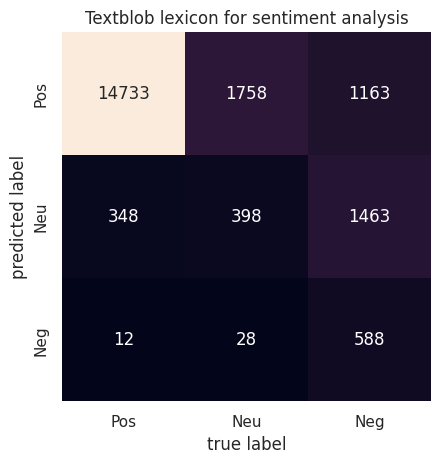

In [ ]:
#visualise the results
matrix12=confusion_matrix(real_sentiments,text_blob_sentiments, labels=unique_labels)
sns.heatmap(matrix12.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Textblob lexicon for sentiment analysis')
plt.show()

In [ ]:
#get the evaluation metrics
accuracyTextBlobLexicon=accuracy_score(real_sentiments, text_blob_sentiments)
accuracyTextBlobLexicon

0.7671172709970231

In [ ]:
f1_macroTextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average='macro')
f1_macroTextBlobLexicon

0.4623651844081122

In [ ]:
f1_TextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average=None)
f1_TextBlobLexicon

array([0.30609058, 0.18119736, 0.89980762])

#### 2. NLTK

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#define a function to predict the sentiment using the polarity value from the NLTK model built with Vader lexicon.
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_vader_sentiment(review):
    result=sia.polarity_scores(review)['compound']
    if result >0.1:
        sentiment='Pos'
    elif result <-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [ ]:
vader_sentiments=[predict_vader_sentiment(df_shuffled['Review'][i]) for i in range(len(df))]

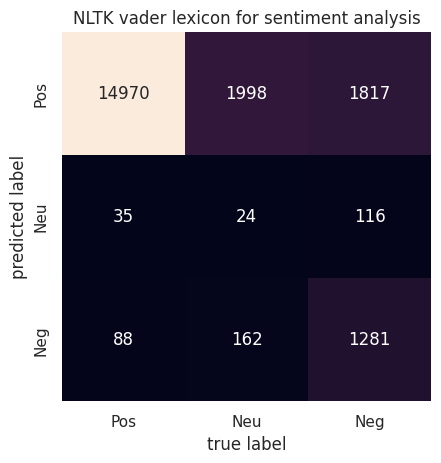

In [ ]:
matrix13=confusion_matrix(real_sentiments,vader_sentiments, labels=unique_labels)
sns.heatmap(matrix13.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('NLTK vader lexicon for sentiment analysis')
plt.show()

In [ ]:
accuracyNLTKVaderLexicon=accuracy_score(real_sentiments, vader_sentiments)
accuracyNLTKVaderLexicon

0.794251134644478

In [ ]:
f1_macroNLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average='macro')
f1_macroNLTKVaderLexicon

0.48134791744476607

In [ ]:
f1_NLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average=None)
f1_NLTKVaderLexicon

array([0.53993678, 0.0203476 , 0.88375937])

# iii. Conclusions
## 9. Evaluations
In order to evaluate all the models together, we will tabulate all the results in a single DataFrame

In [ ]:
#join all the f1 arrays into a single array
f1_summary=np.concatenate((f1NB,f1_GNB,f1_MNNB,f1_DT,f1_SVM,
                                  f1_SVMW,f1_LogReg,f1_RanFor,f1_KNN,f1_NBFeatureExtraction,f1_DTFeatureExtraction,
                                  f1_SVMFeatureExtraction, f1_TextBlobLexicon, f1_NLTKVaderLexicon), axis=0)
#reshape it to the correct shape
f1_summary=f1_summary.reshape((14,3))
#create a dataframe
f1_df=pd.DataFrame(f1_summary, columns=["f1_'Neg'", "f1_'Neu","f1_'Pos"])

In [ ]:
#create a dataframe to summarise the preprocessing techniques, the models and the evaluation metrics
summary=pd.DataFrame({'Pre-processing':['bag of words','lemmatisation and BoW','lemmatisation and BoW',
                                       'lemmatisation and BoW','lemmatisation and BoW','lemmatisation and BoW','lemmatisation and BoW','lemmatisation and BoW',
                                       'lemmatisation and BoW','lemmatisation and feature extraction',
                                       'lemmatisation and feature extraction','lemmatisation and feature extraction'," "," "],
                      'Model':['Gaussian Naive Bayes','Gaussian Naive Bayes','Multinomial Naive Bayes', 'Decision Tree',
                               'Support Vector Machine', 'SVM with weights', 'Logistic Regression', 'Random Forest', 'KNN','Naive Bayes','Decision Tree',
                               'Support Vector Machine','TextBlob Lexicon', 'NLTK Vader Lexicon'],
                      'Accuracy':[accuracyNB,accuracyGNB,accuracyMNNB,accuracyDT,accuracySVM,
                                  accuracySVMW,accuracyLogReg,accuracyRanFor,accuracyKNN,accuracyNBFeatureExtraction, accuracyDTFeatureExtraction,
                                   accuracySVMFeatureExtraction, accuracyTextBlobLexicon,
                                  accuracyNLTKVaderLexicon],
                     'f1_macroaveraging':[f1_macroNB,f1_macroGNB,f1_macroMNNB,f1_macroDT,f1_macroSVM,
                                  f1_macroSVMW,f1_macroLogReg,f1_macroRanFor,f1_macroKNN,f1_macroNBFeatureExtraction,f1_macroDTFeatureExtraction,
                                  f1_macroSVMFeatureExtraction, f1_macroTextBlobLexicon, f1_macroNLTKVaderLexicon]})
summary=pd.concat((summary,f1_df), axis=1)
summary

,Pre-processing,Model,Accuracy,f1_macroaveraging,f1_'Neg',f1_'Neu,f1_'Pos
0,bag of words,Gaussian Naive Bayes,0.716768,0.593500,0.648829,0.297899,0.833772
1,lemmatisation and BoW,Gaussian Naive Bayes,0.707398,0.591772,0.652832,0.297822,0.824660
2,lemmatisation and BoW,Multinomial Naive Bayes,0.821394,0.519992,0.658711,0.003724,0.897539
3,lemmatisation and BoW,Decision Tree,0.732774,0.523513,0.521851,0.197209,0.851477
4,lemmatisation and BoW,Support Vector Machine,0.860629,0.640390,0.772934,0.218182,0.930053
5,lemmatisation and BoW,SVM with weights,0.861800,0.621847,0.780395,0.153846,0.931300
6,lemmatisation and BoW,Logistic Regression,0.864533,0.673768,0.783226,0.305819,0.932261
7,lemmatisation and BoW,Random Forest,0.763029,0.361620,0.222222,0.000000,0.862639
8,lemmatisation and BoW,KNN,0.793090,0.537015,0.571429,0.150892,0.888725
9,lemmatisation and feature extraction,Naive Bayes,0.763029,0.597863,0.657946,0.271605,0.864036


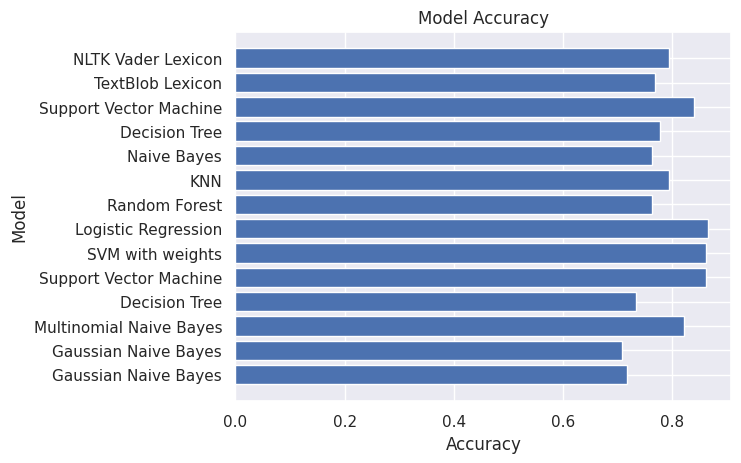

In [ ]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the accuracy values as a horizontal bar chart
ax.barh(summary.index, summary['Accuracy'])

# set the y-axis tick labels to the model names
ax.set_yticks(summary.index)
ax.set_yticklabels(summary['Model'])

# set the axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.set_title('Model Accuracy')

# display the plot
plt.show()


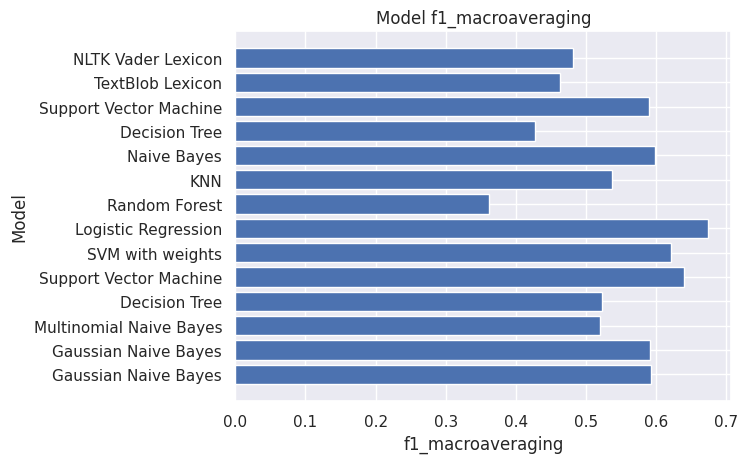

In [ ]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the f1_macroaveraging values as a horizontal bar chart
ax.barh(summary.index, summary['f1_macroaveraging'])

# set the y-axis tick labels to the model names
ax.set_yticks(summary.index)
ax.set_yticklabels(summary['Model'])

# set the axis labels and title
ax.set_xlabel('f1_macroaveraging')
ax.set_ylabel('Model')
ax.set_title('Model f1_macroaveraging')

# display the plot
plt.show()


From the summary table, we can see that most of the models were able to improve the accuracy of the baseline model however, not all of them improved the overall f1 measure when macroaveraging.

Most of the models improved the positive’s and negative’s f1 and as well as the accuracy. However, they performed poorly when classifying the neutral reviews. This is because it is a difficult task. Generally, the people who classify something neutral have equally weighted positive and negative thoughts so overall they score their hotel as neutral.

From a business point of view, an efficient model is the one capable of classifying positive and negative reviews, hence we would look at the models which were better in this task.

In addition, we see that the dataset-trained models performed better than the lexicon-based models that are often used for sentiment analysis, as these are general, while our models are problem-specific.

The best models, which have the highest f1 for Negative and Positive reviews, the highest accuracy rates and the highest f1 with macro averaging are the ones that used Support Vector Machines. SVMs are known as one of the most robust machine learning models and they were the most popular before Neural Networks were popularised.
Out of the three models with SVM, the models with the pre-processing that involved addition of embedding, lemmatisation and Bag of words, perform better than the model with lemmatisation and feature extractions. These models achieved an f1 for the positive reviews higher than 0.93 and around 0.8 for the negatives. Even though we tried to improve the SVM model by taking into account the imbalance of the dataset, this didn’t help. Hence, the best model is the model with the simple SVM without any hyperparameters, achieving an 86.3% accuracy and an f1 with macroaveraging of 0.64%. This will be the model to be proposed as a sentiment analysis predictor for the accommodation sector in the tourism industry.

## 10. Evaluation of the project and its results
We have trained and evaluated eleven different combinations of models and pre-processing techniques. From this, we found that the combination of embeddings, lemmatisation and bag of words together with SVM, is the best text classifier model for sentiment analysis. Even though it showed a high percentage accuracy (86.3%), it perform poorly to classify the reviews which were classified as Neutral.

The creation of this model fulfils the initial objective: which was to create a sentiment analysis model for the tourism industry, especially for the accommodation sector.

We initially stated that the model should have two functions:
1.	It will potentially show the keywords that are used in negative and positive reviews and
2.	It will serve as a predictor for the positivity or negativity of future textual reviews from future customers.

On one hand, this model fulfils the second function as it will be able to predict the sentiment of textual future reviews. From this, the business could identify better where are the areas of improvement both in its facilities and the services provided. These types of insights could be really useful for any tourism business that wants to improve but is unsure where it should put the effort and resources.

On the other hand, the SVM model does not fulfil the first function, as this algorithm works with complicated mathematical formulas which make the model a 'Black Box', meaning that it is hard to be interpreted. Other models are easier to be interpreted and give more insights from learning the features that affect the text classification task. For example, the model made with feature extraction, with Naive Bayes, gave a list of the most informative features. From this, we can understand that 'dirty' and 'rude' are within the 3 most important features that help differentiate between positive and negative reviews. A tourism business should take in mind that it is highly important that the accommodation should look perfectly clean and that the hotel team should be kind and nice at all times. Furthermore, 'spacious' and 'modern' were keywords for positive reviews. These are good insights that the accommodation sector should take into account, especially before refurbishment times.

This project has demonstrated that the combination of several techniques can help achieve the final objective which was to give NLP tools that can help a business in the tourism industry position itself ahead in the market. Furthermore, the same preprocessing and model could be applied for a similar dataset for a different sector within the tourism industry, such as excursions and attractions, or for other sentiment analysis tasks, such as movie reviews.


## References:
1.Kaggle.com. 2020. Trip Advisor Hotel Reviews. [online] Available at: <https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews> [Accessed 31 December 2021].

2.Jurafsky, D. and J.H. Martin Speech and language processing. (2021; 3rd draft ed.) Chapter 4 Naive Bayes and Sentiment Classification

3.Ozen, I. A. (2021). Tourism products and sentiment analysis. In C. Cobanoglu, S. Dogan, K. Berezina, & G. Collins (Eds.), Advances in Hospitality and Tourism Information Technology (pp. 1–44). USF M3 Publishing.
https://www.doi.org/10.5038/9781732127586
